# Compare Machine Learning Algorithms: A Guide for Classification Task

In [1]:
from google.colab import drive
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Upload data from Local File System.

In [3]:
filename = '/content/gdrive/My Drive/ITD105 Final Requirements/breast-cancer-wisconsin.txt'

## Take a peek at your raw data.

In [4]:
names = ['id', 'clump', 'cell_size', 'cell_shape', 'marg_adhesion', 'se_cell_size', 'bare_nuclei', 'bland_chromatin', 'norm_nuclei', 'mitoses', 'class']
data = pd.read_csv(filename, names=names, index_col='id')
data = data[data.bare_nuclei != '?']
data['bare_nuclei'] = pd.to_numeric(data['bare_nuclei'])
peek = data.head(5)
peek

,clump,cell_size,cell_shape,marg_adhesion,se_cell_size,bare_nuclei,bland_chromatin,norm_nuclei,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


## Retrieve `features` and `class` `Inline code`

In [5]:
array = data.values
X = array[:,0:-1]
Y = array[:,-1]

In [6]:
print(X)  # features

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [7]:
print(Y) # class

[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2
 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 2 4 2 4 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 

## Prepare `models`

In [8]:
# container for all models
models = []

### Gaussian Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
models.append(('NB', nb))

### Support Vector Machines

In [10]:
from sklearn.svm import SVC

svm = SVC(probability=True)
models.append(('SVM', svm))

In [11]:
from sklearn.ensemble import VotingClassifier

# create containers of all sub models
estimators = []

# Naive Bayes
model1 = GaussianNB()
estimators.append(('nb', model1))

# Support Vector Machine
model2 = SVC()
estimators.append(('svm', model2))

## `Train` and `Cross-valiidate`

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
msgs = []

msgs.append('accuracy')

for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s:\t %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msgs.append(msg)

msgs.append('\nlog loss')

for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_log_loss')
  results.append(cv_results)
  names.append(name)
  msg = "%s:\t %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msgs.append(msg)

msgs.append('\nauc')

for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
  results.append(cv_results)
  names.append(name)
  msg = "%s:\t %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msgs.append(msg)

for accuracy in msgs:
  print(accuracy)

accuracy
NB:	 0.963427 (0.023778)
SVM:	 0.967860 (0.034280)

log loss
NB:	 -0.824068 (0.535494)
SVM:	 -0.101396 (0.080566)

auc
NB:	 0.984277 (0.016232)
SVM:	 0.988249 (0.013008)


# Algorithmic Tuning

## Prepare the model and the paramters to tune

In [13]:
best_model = 'SVM'
models = []
param_grids = []

### [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [14]:
nb = GaussianNB()
models.append(('NB', nb))

param_grid_nb = {                
    'var_smoothing': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001],
}
param_grids.append(('NB', param_grid_nb))

### [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [15]:
svm = SVC()
models.append(('SVM', svm))

param_grid_svm = {                
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],           
    'C': [100.0, 10.0, 5.0, 1.0, 0.5, 0.1, 0.05, 0.01, 0.001],
}
param_grids.append(('SVM', param_grid_svm))

## Finding the best parameters

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


for m_name, model in models:
  for p_name, p_grid in param_grids:
    if m_name==best_model and p_name==best_model:
      kfold = KFold(n_splits=10)
      grid = GridSearchCV(estimator=model, param_grid=p_grid, cv=kfold, scoring='accuracy')
      trained_model = grid.fit(X, Y)

print('accuracy')
print(trained_model.best_score_)
print(trained_model.best_params_)

accuracy
0.9693094629156012
{'C': 0.01, 'kernel': 'rbf'}


# Feature Selection

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

#separate features and target class
x = data.iloc[:,0:-1]
y = data.loc[:,'class']

#select subset of features 
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x,y)
feature_scores = fit.scores_

#summarize the scores
features = data.columns.values[0:-1]
compare_df = pd.DataFrame({'Feature': features, 'Score': feature_scores})
compare_df

,Feature,Score
0,clump,624.135704
1,cell_size,1370.064587
2,cell_shape,1279.767704
3,marg_adhesion,986.417879
4,se_cell_size,497.536763
5,bare_nuclei,1729.066174
6,bland_chromatin,682.978239
7,norm_nuclei,1143.866712
8,mitoses,228.994346


In [18]:
x.head(5)

,clump,cell_size,cell_shape,marg_adhesion,se_cell_size,bare_nuclei,bland_chromatin,norm_nuclei,mitoses
id,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1
1002945,5,4,4,5,7,10,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,8,8,1,3,4,3,7,1
1017023,4,1,1,3,2,1,3,1,1


In [19]:
test.fit_transform(x,y)[:5]

array([[ 1,  1,  1,  1],
       [ 4,  4, 10,  2],
       [ 1,  1,  2,  1],
       [ 8,  8,  4,  7],
       [ 1,  1,  1,  1]])

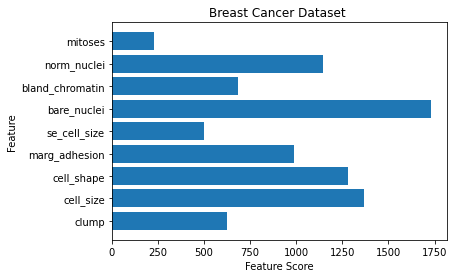

In [20]:
#visualize the scores
plt.barh(features,feature_scores)
plt.title('Breast Cancer Dataset ')
plt.ylabel('Feature')
plt.xlabel('Feature Score')
plt.show()

# Finalizing the Best Model

## Prepare the best model

In [21]:
from sklearn.svm import SVC

best_model = SVC(C=0.01, kernel='rbf')

## Split dataset

In [22]:
data = data[['cell_size', 'cell_shape', 'bare_nuclei', 'norm_nuclei', 'class']]
array = data.values
X = array[:,0:-1]
Y = array[:,-1]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

##Train best model

In [24]:
best_model.fit(X_train, Y_train)

SVC(C=0.01)

## Result

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


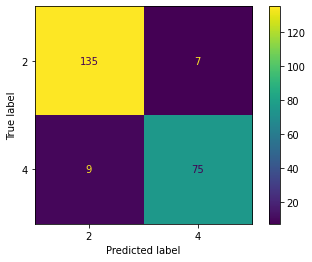

In [25]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, X_test, Y_test) 
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
 
print(confusion_matrix(Y_test, best_model.predict(X_test)))
print(accuracy_score(Y_test, best_model.predict(X_test)))

[[135   7]
 [  9  75]]
0.9292035398230089


In [27]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           2       0.94      0.95      0.94       142
           4       0.91      0.89      0.90        84

    accuracy                           0.93       226
   macro avg       0.93      0.92      0.92       226
weighted avg       0.93      0.93      0.93       226



In [30]:
import joblib
filename = '/content/gdrive/My Drive/ITD105 Final Requirements/model.aiml'
joblib.dump(best_model, filename)

['/content/gdrive/My Drive/ITD105 Final Requirements/model.aiml']